### Load the Dataset

In [86]:
import pandas as pd
import numpy as np
# Load the CSV file
file_path = "Travel_data.csv"  # Make sure the file is in the same directory as your notebook
df = pd.read_csv(file_path)

# Preview the first few rows
df.head()

,Geography,Traveller characteristics,Traveller type,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,...,Mar-24,Apr-24,May-24,Jun-24,Jul-24,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24
0,Newfoundland and Labrador,"United States of America residents, air 2",Excursionists (same-day) 3 4,151,181,89,188,211,404,391,...,294,344,784,817,"1,129",742,731,468,210,265
1,NaN,NaN,Tourists (overnight) 3 4,17,9,2,1,12,17,13,...,59,177,114,121,257,167,209,56,36,50
2,NaN,"United States of America residents, land 5 6",Excursionists (same-day) 3 4,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,NaN,NaN,Tourists (overnight) 3 4,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,NaN,"United States of America residents, water 6",Excursionists (same-day) 3 4,0,0,0,0,0,0,3,...,0,0,1,0,"3,634","6,828","4,433",58,0,0


## Data Cleaning & Preprocessing

### Fix Column Data

In [87]:
# Fill down province names in the 'Geography' column
df["Geography"] = df["Geography"].fillna(method="ffill")

# Fill down missing values in the 'Traveller characteristics' column
df["Traveller characteristics"] = df["Traveller characteristics"].fillna(method="ffill")

# Remove digits and extra spaces from 'Traveller characteristics'
df["Traveller characteristics"] = df["Traveller characteristics"].str.replace(r"\s*\d+", "", regex=True).str.strip()

# Remove digits and extra spaces from 'Traveller type'
df["Traveller type"] = df["Traveller type"].str.replace(r"\s*\d+", "", regex=True).str.strip()

# Check if it worked
df.head(10)

,Geography,Traveller characteristics,Traveller type,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,...,Mar-24,Apr-24,May-24,Jun-24,Jul-24,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24
0,Newfoundland and Labrador,"United States of America residents, air",Excursionists (same-day),151,181,89,188,211,404,391,...,294,344,784,817,"1,129",742,731,468,210,265
1,Newfoundland and Labrador,"United States of America residents, air",Tourists (overnight),17,9,2,1,12,17,13,...,59,177,114,121,257,167,209,56,36,50
2,Newfoundland and Labrador,"United States of America residents, land",Excursionists (same-day),...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Newfoundland and Labrador,"United States of America residents, land",Tourists (overnight),...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Newfoundland and Labrador,"United States of America residents, water",Excursionists (same-day),0,0,0,0,0,0,3,...,0,0,1,0,"3,634","6,828","4,433",58,0,0
5,Newfoundland and Labrador,"United States of America residents, water",Tourists (overnight),0,0,0,0,0,0,3,...,4,1,16,109,263,"5,957","2,267",3,4,0
6,Newfoundland and Labrador,Residents of countries other than the United S...,Excursionists (same-day),0,0,0,0,0,0,0,...,297,337,451,247,371,384,317,259,255,252
7,Newfoundland and Labrador,Residents of countries other than the United S...,Tourists (overnight),331,257,287,282,362,451,440,...,364,235,979,677,"1,028",782,671,465,297,256
8,Newfoundland and Labrador,Residents of countries other than the United S...,Excursionists (same-day),...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Newfoundland and Labrador,Residents of countries other than the United S...,Tourists (overnight),...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Reshape the Data

In [88]:
# Identify date columns (starting from column index 3 onward)
date_columns = df.columns[3:]

# Melt the DataFrame to long format
df_melted = df.melt(
    id_vars=["Geography", "Traveller characteristics", "Traveller type"],
    value_vars=date_columns,
    var_name="Month-Year",
    value_name="Number of Travellers"
)

# Preview the reshaped data
df_melted.head()

,Geography,Traveller characteristics,Traveller type,Month-Year,Number of Travellers
0,Newfoundland and Labrador,"United States of America residents, air",Excursionists (same-day),Jan-21,151
1,Newfoundland and Labrador,"United States of America residents, air",Tourists (overnight),Jan-21,17
2,Newfoundland and Labrador,"United States of America residents, land",Excursionists (same-day),Jan-21,...
3,Newfoundland and Labrador,"United States of America residents, land",Tourists (overnight),Jan-21,...
4,Newfoundland and Labrador,"United States of America residents, water",Excursionists (same-day),Jan-21,0


#### Clean the "Number of Travellers" Column

In [89]:
# Clean the 'Number of Travellers' column
df_melted["Number of Travellers"] = (
    df_melted["Number of Travellers"]
    .replace("...", np.nan)                  # Replace symbol legend
    .replace(",", "", regex=True)            # Remove commas
    .astype(str)                             # Ensure all are strings
    .str.strip()                             # Remove extra spaces
    .replace("", np.nan)                     # Replace empty strings
    .astype(float)                           # Convert to float
)

# Drop rows with missing values
df_melted.dropna(subset=["Number of Travellers"], inplace=True)

# Check results
df_melted.head()

,Geography,Traveller characteristics,Traveller type,Month-Year,Number of Travellers
0,Newfoundland and Labrador,"United States of America residents, air",Excursionists (same-day),Jan-21,151.0
1,Newfoundland and Labrador,"United States of America residents, air",Tourists (overnight),Jan-21,17.0
4,Newfoundland and Labrador,"United States of America residents, water",Excursionists (same-day),Jan-21,0.0
5,Newfoundland and Labrador,"United States of America residents, water",Tourists (overnight),Jan-21,0.0
6,Newfoundland and Labrador,Residents of countries other than the United S...,Excursionists (same-day),Jan-21,0.0


#### Convert "Month-Year" to a Proper Date Format

In [90]:
# Convert to datetime, then to period (monthly granularity)
df_melted["Month_Year"] = pd.to_datetime(df_melted["Month-Year"], format="%b-%y").dt.to_period('M')

# Drop original 'Month-Year' column if needed
df_melted.drop(columns=["Month-Year"], inplace=True)

# Preview
df_melted.head()

,Geography,Traveller characteristics,Traveller type,Number of Travellers,Month_Year
0,Newfoundland and Labrador,"United States of America residents, air",Excursionists (same-day),151.0,2021-01
1,Newfoundland and Labrador,"United States of America residents, air",Tourists (overnight),17.0,2021-01
4,Newfoundland and Labrador,"United States of America residents, water",Excursionists (same-day),0.0,2021-01
5,Newfoundland and Labrador,"United States of America residents, water",Tourists (overnight),0.0,2021-01
6,Newfoundland and Labrador,Residents of countries other than the United S...,Excursionists (same-day),0.0,2021-01


#### Check for Missing Values

In [91]:
# Count missing values in each column
df_melted.isnull().sum()

Geography                    0
Traveller characteristics    0
Traveller type               0
Number of Travellers         0
Month_Year                   0
dtype: int64

#### Explore Categorical Values

In [92]:
# Check unique values in key columns
print("Geographies:", df_melted["Geography"].nunique())
print("Traveller Types:", df_melted["Traveller type"].unique())
print("Traveller Characteristics:", df_melted["Traveller characteristics"].unique())
print("Date Range:", df_melted["Month_Year"].min(), "to", df_melted["Month_Year"].max())

Geographies: 13
Traveller Types: ['Excursionists (same-day)' 'Tourists (overnight)']
Traveller Characteristics: ['United States of America residents, air'
 'United States of America residents, water'
 'Residents of countries other than the United States of America, air'
 'Residents of countries other than the United States of America, water'
 'Canadian residents returning from the United States of America, air'
 'Canadian residents returning from the United States of America, water'
 'Canadian residents returning from countries other than the United States of America, air'
 'Canadian residents returning from countries other than the United States of America, water'
 'United States of America residents, land'
 'Residents of countries other than the United States of America, land'
 'Canadian residents returning from the United States of America, land'
 'Canadian residents returning from countries other than the United States of America, land']
Date Range: 2021-01 to 2024-12


#### Check Column Data Types

In [93]:
# Ensure 'Number of Travellers' is numeric
type_trends["Number of Travellers"] = pd.to_numeric(type_trends["Number of Travellers"], errors='coerce')

In [94]:
# Verify datatypes
df_melted.dtypes

Geography                       object
Traveller characteristics       object
Traveller type                  object
Number of Travellers           float64
Month_Year                   period[M]
dtype: object

### Save Cleaned Dataset

In [95]:
# Save the cleaned and reshaped DataFrame to a new CSV file
df_melted.to_csv("Cleaned_Travel_Data.csv", index=False)

# Optional: Confirm the file was saved
print("Cleaned data saved as 'Cleaned_Travel_Data.csv'")

Cleaned data saved as 'Cleaned_Travel_Data.csv'


###  Exploratory Data Analysis (EDA)

### Total Travellers Over Time

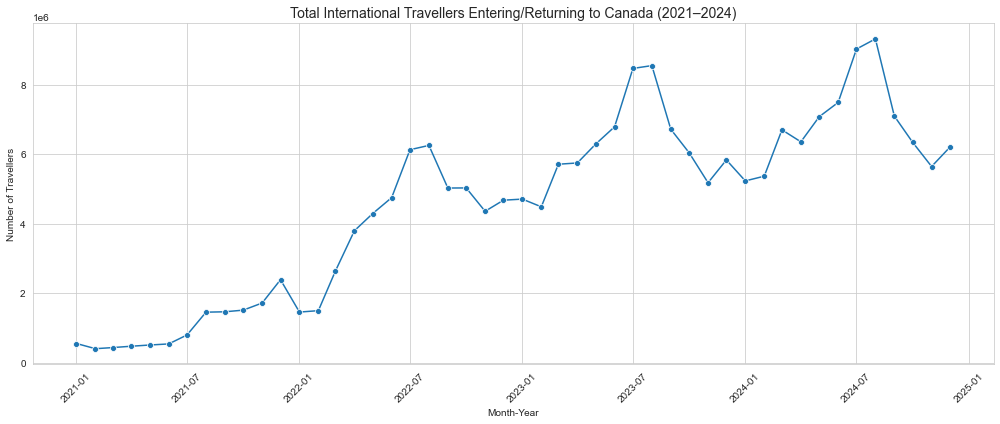

In [96]:
# Plot total travellers over time (no timestamp conversion needed now)
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

sns.lineplot(data=monthly_totals, x="Month_Year", y="Number of Travellers", marker="o")

plt.title("Total International Travellers Entering/Returning to Canada (2021–2024)", fontsize=14)
plt.xlabel("Month-Year")
plt.ylabel("Number of Travellers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total International Travellers (2021–2024)

This line chart shows the **monthly trend** of travellers entering or returning to Canada between **January 2021 and December 2024**.

####  Key Observations:
- There was a **steady recovery** in travel volume after early 2021, likely due to **post-pandemic reopening**.
- Peaks appear consistently during the **summer months** (June–August), indicating **seasonal travel patterns**.
- A **significant surge** occurred mid-2023 and mid-2024, reaching over **9 million travellers** in peak months.
- Travel volume **dipped during winter months**, possibly due to weather and post-holiday slowdowns.

### Top Provinces by Total Travellers

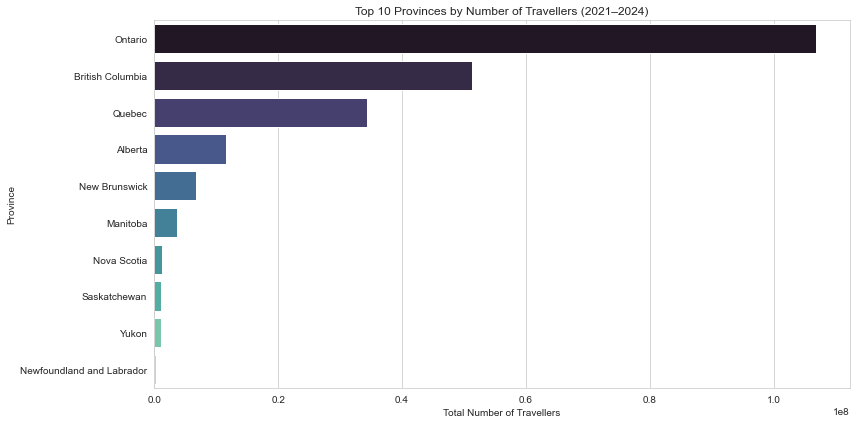

In [97]:
# Group and sort provinces
top_provinces = (
    df_melted.groupby("Geography")["Number of Travellers"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_provinces.values, y=top_provinces.index, palette="mako")

plt.title("Top 10 Provinces by Number of Travellers (2021–2024)")
plt.xlabel("Total Number of Travellers")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

### Top 10 Provinces by Number of Travellers (2021–2024)

This horizontal bar chart displays the **top 10 provinces** with the highest number of international travellers entering or returning to Canada between **2021 and 2024**.

#### Key Observations:
- **Ontario** leads by a wide margin, highlighting its role as the **primary entry hub**, likely due to **Pearson International Airport** and dense population.
- **British Columbia** and **Quebec** follow closely, supported by major airports in **Vancouver** and **Montreal**.
- Provinces like **Alberta**, **New Brunswick**, and **Manitoba** show moderate traveller volumes, reflecting regional traffic.
- **Nova Scotia**, **Saskatchewan**, **Yukon**, and **Newfoundland and Labrador** round out the top 10, with significantly fewer travellers.
- This filtered view improves focus by excluding territories with negligible counts.

**Insight**: **Traveller volume is concentrated in a few provinces**, driven by infrastructure, tourism, and economic activity.

### Traveller Trends by Traveller Type

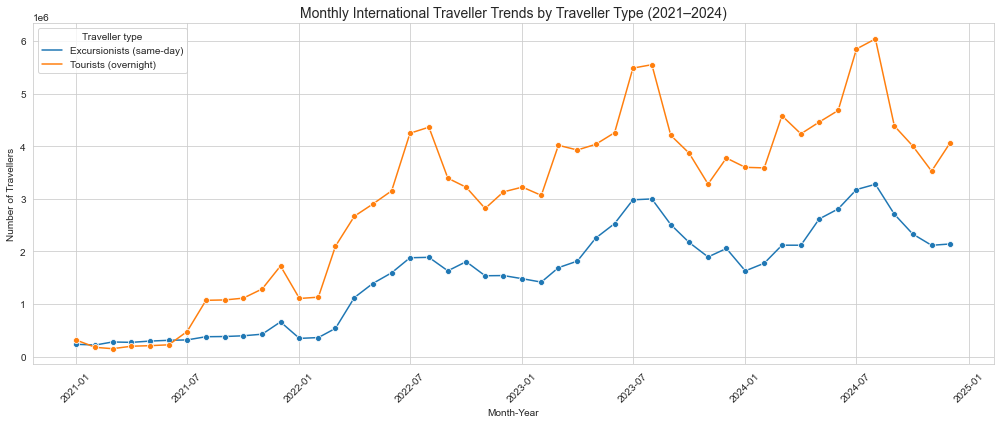

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=type_trends, x="Month_Year", y="Number of Travellers", hue="Traveller type", marker="o")

plt.title("Monthly International Traveller Trends by Traveller Type (2021–2024)", fontsize=14)
plt.xlabel("Month-Year")
plt.ylabel("Number of Travellers")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

###  Monthly International Traveller Trends by Traveller Type (2021–2024)

This line chart highlights the monthly trends of travellers entering or returning to Canada, separated by **Traveller Type**:

- **Tourists (overnight)** consistently make up a larger portion of total travellers compared to **Excursionists (same-day)**.
- There is a clear **seasonal pattern**, with peaks typically occurring mid-year (summer months), which aligns with typical vacation periods.
- Both categories saw a **steady recovery post-2021**, with visible dips during winter months.
- The sharp growth in 2022–2024 reflects a rebound in international mobility, possibly due to **post-COVID border re-openings and relaxed travel restrictions**.

**Insight**: Overnight tourism is a key component of Canada's international travel volume and is more sensitive to seasonal fluctuations.

### Top Traveller Characteristics

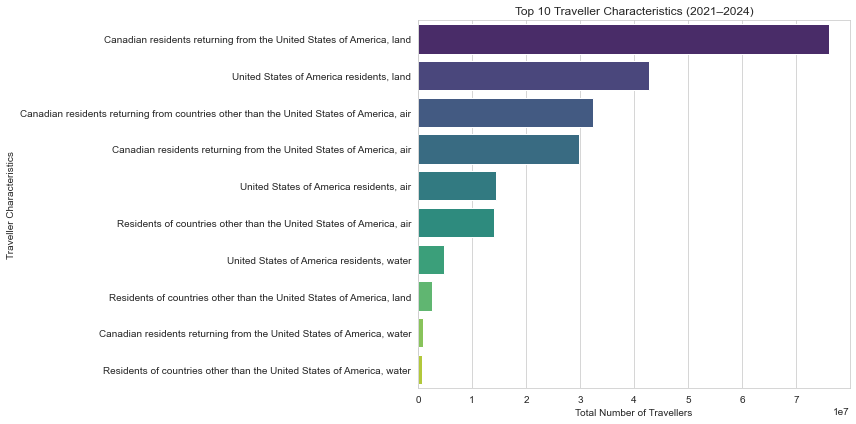

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sort the data
top_char = (
    df_melted.groupby("Traveller characteristics")["Number of Travellers"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_char.values, y=top_char.index, palette="viridis")

plt.title("Top 10 Traveller Characteristics (2021–2024)")
plt.xlabel("Total Number of Travellers")
plt.ylabel("Traveller Characteristics")
plt.tight_layout()
plt.show()

### Top 10 Traveller Characteristics (2021–2024)

This bar chart highlights the **top 10 traveller groups** entering or returning to Canada from 2021 to 2024, based on **residency status** and **mode of transport**.

#### Key Observations:
- The **largest group** is *Canadian residents returning from the U.S. via land*, followed by *U.S. residents entering via land*.
- **Air travel** is the second most dominant mode, especially among **Canadian returnees** and **foreign residents**.
- **Land-based travel** clearly surpasses other modes in total volume.
- Although included, **water travel** remains minimal, indicating **limited seasonal or niche usage**.

**Insight**: **Land crossings**, particularly between Canada and the U.S., remain the **backbone of international mobility**, underscoring deep cross-border integration.